**Rozdział 12. Modele niestandardowe i uczenie za pomocą modułu TensorFlow**

_Notatnik ten zawiera przykładowy kod i rozwiązania ćwiczeń opisane w rozdziale 12._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/12_custom_models_and_training_with_tensorflow.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Uruchom w Google Colab (wersja angielska)</a>
  </td>
</table>

# Konfiguracja

Importujmy najpierw kilka popularnych modułów, upewnijmy się, że będą wstawiane wykresy MatplotLib, a także przygotujmy funkcję zapisującą rysunki. Sprawdzimy także, czy jest zainstalowane środowisko Python 3.5 lub nowsze (możliwe, że kod będzie działał w środowisku Python 2.x, zostało ono jednak porzucone, dlatego zalecamy korzystanie ze środowiska Python 3), a także biblioteka Scikit-Learn 0.20 lub nowsza i TensorFlow 2.0 lub nowszy.

In [1]:
# Wymagane środowisko Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Wymagana biblioteka Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version istnieje jedynie w środowisku Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# Wymagany moduł TensorFlow ≥2.0
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Importuje standardowe biblioteki
import numpy as np
import os

# Aby wyniki uzyskiwane w tym notatniku były odtwarzalne
np.random.seed(42)

# Do rysowania ładnych wykresów
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ścieżka zapisywania rysunków
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "R12"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Tensory i operacje

### Tensory

In [2]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # macierz

<tf.Tensor: id=0, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42) # skalar

<tf.Tensor: id=1, shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: id=2, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [5]:
t.shape

TensorShape([2, 3])

In [6]:
t.dtype

tf.float32

### Indeksowanie

In [7]:
t[:, 1:]

<tf.Tensor: id=6, shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [8]:
t[..., 1, tf.newaxis]

<tf.Tensor: id=10, shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### Operacje

In [9]:
t + 10

<tf.Tensor: id=12, shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: id=13, shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose(t)

<tf.Tensor: id=16, shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### Korzystanie z klasy keras.backend

In [12]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: id=21, shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### Konwersje z/do obiektów NumPy

In [13]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: id=22, shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [14]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [15]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
tf.square(a)

<tf.Tensor: id=24, shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [17]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Konflikty typów

In [18]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [19]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [20]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: id=32, shape=(), dtype=float32, numpy=42.0>

### Łańcuchy znaków

In [21]:
tf.constant(b"uczenie maszynowe")

<tf.Tensor: id=33, shape=(), dtype=string, numpy=b'uczenie maszynowe'>

In [22]:
tf.constant("café")

<tf.Tensor: id=34, shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [23]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: id=35, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [24]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: id=46, shape=(), dtype=int32, numpy=4>

In [25]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: id=50, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

### Tablice łańcuchowe

In [26]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [27]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: id=52, shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [28]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [29]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


### Tensory nierówne

In [30]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [31]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [32]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [33]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [34]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: id=202, shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [35]:
r.to_tensor()

<tf.Tensor: id=267, shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

### Tensory rzadkie

In [36]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [37]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [38]:
tf.sparse.to_dense(s)

<tf.Tensor: id=272, shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [39]:
s2 = s * 2.0

In [40]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [41]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: id=276, shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [42]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [43]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order [Op:SparseToDense]


In [44]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: id=285, shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Zbiory

In [45]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: id=292, shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [46]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: id=297, shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [47]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: id=302, shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

### Zmienne

In [48]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [49]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [50]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [51]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [52]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [53]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [54]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### Tablice tensorowe

In [55]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [56]:
array.read(1)

<tf.Tensor: id=337, shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [57]:
array.stack()

<tf.Tensor: id=342, shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [58]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: id=350, shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [59]:
variance

<tf.Tensor: id=351, shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

## Niestandardowe funkcje straty

Zacznijmy od wczytania i przygotowania zestawu danych California Housing. Najpierw go wczytamy, następnie rozdzielimy na zbiór uczący, walidacyjny i testowy, a na końcu przeskalujemy go:

In [60]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [61]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

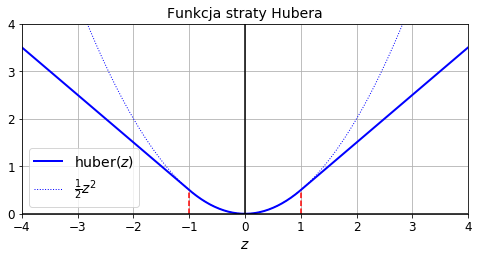

In [62]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Funkcja straty Hubera", fontsize=14)
plt.show()

In [63]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [64]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [65]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 138us/sample - loss: 0.5971 - mae: 0.9522 - val_loss: 0.2698 - val_mae: 0.5599
Epoch 2/2
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2066 - mae: 0.4983 - val_loss: 0.2048 - val_mae: 0.4883


## Zapisywanie/wczytywanie modeli za pomocą niestandardowych obiektów

In [66]:
model.save("moj_model_z_niestandardowa_funkcja_straty.h5")

In [67]:
model = keras.models.load_model("moj_model_z_niestandardowa_funkcja_straty.h5",
                                custom_objects={"huber_fn": huber_fn})

In [68]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 86us/sample - loss: 0.1988 - mae: 0.4874 - val_loss: 0.1843 - val_mae: 0.4662
Epoch 2/2
11610/11610 [==============================] - 0s 40us/sample - loss: 0.1955 - mae: 0.4837 - val_loss: 0.1825 - val_mae: 0.4641


In [69]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [70]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [71]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 112us/sample - loss: 0.2179 - mae: 0.4841 - val_loss: 0.2079 - val_mae: 0.4707
Epoch 2/2
11610/11610 [==============================] - 0s 39us/sample - loss: 0.2139 - mae: 0.4807 - val_loss: 0.2342 - val_mae: 0.4818


In [72]:
model.save("moj_model_z_niestandardowym_progiem_f_straty_2.h5")

In [73]:
model = keras.models.load_model("moj_model_z_niestandardowym_progiem_f_straty_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [74]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 94us/sample - loss: 0.2134 - mae: 0.4791 - val_loss: 0.2109 - val_mae: 0.4667
Epoch 2/2
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2106 - mae: 0.4761 - val_loss: 0.2104 - val_mae: 0.4650


In [75]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [77]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [78]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 104us/sample - loss: 0.7770 - mae: 0.9554 - val_loss: 0.5638 - val_mae: 0.6553
Epoch 2/2
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2504 - mae: 0.5096 - val_loss: 0.4560 - val_mae: 0.5986


In [79]:
model.save("moj_model_z_niestandardowa_klasa_funkcji_straty.h5")

In [80]:
#model = keras.models.load_model("moj_model_z_niestandardowa_klasa_funkcji_straty.h5", # do zrobienia: sprawdź PR #25956
#                                custom_objects={"HuberLoss": HuberLoss})

In [81]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 0s 39us/sample - loss: 0.2383 - mae: 0.5006 - val_loss: 0.3670 - val_mae: 0.5556
Epoch 2/2
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2286 - mae: 0.4936 - val_loss: 0.2715 - val_mae: 0.4983


In [82]:
#model = keras.models.load_model("moj_model_z_niestandardowa_klasa_funkcji_straty.h5",  # do zrobienia: sprawdź PR #25956
#                                custom_objects={"HuberLoss": HuberLoss})

In [83]:
model.loss.threshold

2.0

## Inne niestandardowe funkcje

In [84]:
def my_softplus(z): # zwracaną wartością jest po prostu tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # zwracaną wartością jest po prostu  tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [85]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [87]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [88]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 120us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/2
11610/11610 [==============================] - 0s 38us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan


In [89]:
model.save("moj_model_z_wieloma_niestandardowymi_elementami.h5")

In [90]:
model = keras.models.load_model(
    "moj_model_z_wieloma_niestandardowymi_elementami.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": lambda: my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [91]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [93]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [94]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 105us/sample - loss: 2.1135 - mae: 0.9827 - val_loss: nan - val_mae: nan
Epoch 2/2
11610/11610 [==============================] - 0s 37us/sample - loss: 0.6714 - mae: 0.5201 - val_loss: nan - val_mae: nan


In [95]:
model.save("moj_model_z_wieloma_niestandardowymi_elementami.h5")

In [96]:
model = keras.models.load_model(
    "moj_model_z_wieloma_niestandardowymi_elementami.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": lambda: my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

## Niestandardowe metryki

In [97]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [98]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [99]:
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 85us/sample - loss: 2.0428 - huber_fn: 0.8892
Epoch 2/2
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5577 - huber_fn: 0.2694


**Ostrzeżenie**: jeżeli korzystasz z tej samej funkcji do obliczania i straty i jako mteryki, mogą Cię zaskoczyć odmienne rezultaty. Najczęściej wynika to jedynie z błędów precyzji operacji zmiennoprzecinkowych: nawet jeśli równania matematyczne są sobie równoważne, operacje nie są realizowane w tej samej kolejności, co może prowadzić do niewielkich różnic. Ponadto podczas korzystania z wag przykładów pojawiają się dodatkowe zjawiska:
* funkcja straty od początku epoki stanowi średnią wszystkich dotychczas ujrzanych funkcji strat grup. Każda funkcja straty grupy jest sumą ważonych funkcji straty przykładów podzielonych przez _rozmiar grupy_ (a nie sumę wag, zatem funkcja straty grupy _nie_ jest średnią ważoną z funkcji straty).
* metryka od początku epoki jest równa sumie ważonych funkcji straty przykładów dzielonych przez wszystkie dotychczas ujrzane wagi. Inaczej mówiąc, mamy tu do czynienia ze średnią ważoną wszystkich funkcji straty przykładów. Nie są to te same wartości.

Jeżeli pobawisz się w liczenie, zauważysz, że funkcja straty = metryka * średnia wag przykładów (a także jakiś błąd precyzji zmiennoprzecinkowej).

In [100]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [101]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 106us/sample - loss: 0.1196 - huber_fn: 0.2414
Epoch 2/2
11610/11610 [==============================] - 0s 32us/sample - loss: 0.1143 - huber_fn: 0.2301


In [102]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11960818598642112, 0.11977016045559288)

### Metryki strumieniowe

In [103]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: id=40989, shape=(), dtype=float32, numpy=0.8>

In [104]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: id=41036, shape=(), dtype=float32, numpy=0.5>

In [105]:
precision.result()

<tf.Tensor: id=41045, shape=(), dtype=float32, numpy=0.5>

In [106]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [107]:
precision.reset_states()

Tworzenie metryki strumieniowej:

In [108]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # obsługuje argumenty bazowe (np. dtype)
        self.threshold = threshold
        #self.huber_fn = create_huber(threshold) # do zrobienia: sprawdzić, dlaczego nie działa
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def huber_fn(self, y_true, y_pred): # obejście
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [109]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: id=41092, shape=(), dtype=float32, numpy=14.0>

In [110]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: id=41123, shape=(), dtype=float32, numpy=7.0>

In [111]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [112]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

Sprawdźmy czy klasa `HuberMetric` działa właściwie:

In [113]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [114]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [115]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 94us/sample - loss: 0.8395 - huber_metric_1: 0.8395
Epoch 2/2
11610/11610 [==============================] - 0s 30us/sample - loss: 0.2596 - huber_metric_1: 0.2596


In [116]:
model.save("moj_model_z_niestandardowa_metryka.h5")

In [117]:
#model = keras.models.load_model("my_model_with_a_custom_metric.h5",           # do zrobienia: sprawdzić PR #25956
#                                custom_objects={"huber_fn": create_huber(2.0),
#                                                "HuberMetric": HuberMetric})

In [118]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 0s 32us/sample - loss: 0.2352 - huber_metric_1: 0.2352
Epoch 2/2
11610/11610 [==============================] - 0s 30us/sample - loss: 0.2269 - huber_metric_1: 0.2269


In [119]:
model.metrics[0].threshold

2.0

Wygląda na to, że działa jak należy! Moglibyśmy stworzyć klasę jeszcze w prostszy sposób:

In [120]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}        

Klasa ta lepiej radzi sobie z wymiarami, a także obsługuje wagi przykładów. 

In [121]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [122]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [123]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4337 - HuberMetric: 0.8565
Epoch 2/2
11610/11610 [==============================] - 0s 30us/sample - loss: 0.1228 - HuberMetric: 0.2426


In [124]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.4336747287920998, 0.43367434942766264)

In [125]:
model.save("moj_model_z_niestandardowa_metryka_v2.h5")

In [126]:
#model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",        # do zrobienia: sprawdzić PR #25956
#                                custom_objects={"HuberMetric": HuberMetric})

In [127]:
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 52us/sample - loss: 0.2276 - HuberMetric: 0.2276
Epoch 2/2
11610/11610 [==============================] - 0s 29us/sample - loss: 0.2177 - HuberMetric: 0.2177


In [128]:
model.metrics[0].threshold

2.0

## Niestandardowe warstwy

In [129]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [130]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: id=56424, shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

Dodanie warstwy wykładniczej na wyjściu modelu regresyjnego może się przydawać wtedy, jeśli prognozowane wartości są dodatnie i mieszczą się w bardzo różnych skalach (np. 0,001, 10, 10000):

In [131]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 93us/sample - loss: nan - val_loss: nan
Epoch 2/5
11610/11610 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 3/5
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 4/5
11610/11610 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 5/5
11610/11610 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
5160/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================

nan

In [132]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # musi być na końcu

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [133]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [134]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 91us/sample - loss: 1.8234 - val_loss: 0.7406
Epoch 2/2
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5822 - val_loss: 0.5078
5160/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.5003212963887887

In [135]:
model.save("moj_model_z_niestandardowa_warstwa.h5")

In [136]:
model = keras.models.load_model("moj_model_z_niestandardowa_warstwa.h5",
                                custom_objects={"MyDense": MyDense})

In [137]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [138]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

Stwórzmy warstwę cechującą się odmiennym działaniem podczas uczenia i testowania:

In [139]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [140]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 92us/sample - loss: 0.4603 - val_loss: 0.7665
Epoch 2/2
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4216 - val_loss: 0.5020
5160/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.40479249898777453

## Niestandardowe modele

In [141]:
X_new_scaled = X_test_scaled

In [142]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.n_layers = n_layers                                     # nieukazane w książce
        self.n_neurons = n_neurons                                   # nieukazane
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z
    
    def get_config(self):                                               # nieukazane
        base_config = super().get_config()                              # nieukazane
        return {**base_config,                                          # nieukazane
                "n_layers": self.n_layers, "n_neurons": self.n_neurons} # nieukazane

In [143]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.output_dim = output_dim                                 # nieukazane w książce
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

    def get_config(self):                                            # nieukazane
        base_config = super().get_config()                           # nieukazane
        return {**base_config,                                       # nieukazane
                "output_dim": self.output_dim}                       # nieukazane

In [144]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 164us/sample - loss: 107.9133
Epoch 2/5
11610/11610 [==============================] - 1s 50us/sample - loss: 1.7281
Epoch 3/5
11610/11610 [==============================] - 1s 49us/sample - loss: 1.0739
Epoch 4/5
11610/11610 [==============================] - 1s 47us/sample - loss: 0.8633
Epoch 5/5
11610/11610 [==============================] - 1s 47us/sample - loss: 1.3357
5160/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [145]:
model.save("moj_niestandardowy_model.ckpt")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: moj_niestandardowy_model.ckpt\assets


In [146]:
model = keras.models.load_model("moj_niestandardowy_model.ckpt")

In [147]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 165us/sample - loss: 2.0208
Epoch 2/5
11610/11610 [==============================] - 1s 48us/sample - loss: 0.6524
Epoch 3/5
11610/11610 [==============================] - ETA: 0s - loss: 1.718 - 1s 50us/sample - loss: 1.6753
Epoch 4/5
11610/11610 [==============================] - 1s 47us/sample - loss: 0.6309
Epoch 5/5
11610/11610 [==============================] - 1s 47us/sample - loss: 1.4720


Moglibyśmy zdefiniować model za pomocą interfejsu sekwencyjnego:

In [148]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [149]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 165us/sample - loss: 2.1715
Epoch 2/5
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4413
Epoch 3/5
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3924
Epoch 4/5
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4360
Epoch 5/5
11610/11610 [==============================] - 0s 35us/sample - loss: 0.6704
5160/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Funkcje straty i metryki bazujące na elementach wewnętrznych modelu

In [150]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        # Do zrobienia: sprawdzić https://github.com/tensorflow/tensorflow/issues/26260
        #self.reconstruction_mean = keras.metrics.Mean(name="blad_rekonstrukcji")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        #jeżeli uczenie:
        #    result = self.reconstruction_mean(recon_loss)
        #    self.add_metric(result)
        return self.out(Z)

In [151]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 2s 180us/sample - loss: 0.6548
Epoch 2/2
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4294


## Obliczanie gradientów za pomocą różniczkowania automatycznego

In [152]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [153]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [154]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [155]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [156]:
gradients

[<tf.Tensor: id=93635, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=93627, shape=(), dtype=float32, numpy=10.0>]

In [157]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [158]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

In [159]:
dz_dw1, dz_dw2

(<tf.Tensor: id=93683, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=93688, shape=(), dtype=float32, numpy=10.0>)

In [160]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [161]:
gradients

[None, None]

In [162]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [163]:
gradients

[<tf.Tensor: id=93726, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=93718, shape=(), dtype=float32, numpy=10.0>]

In [164]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: id=93802, shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: id=93803, shape=(), dtype=float32, numpy=30.0>]

In [165]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

In [166]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [167]:
jacobians

[<tf.Tensor: id=93911, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=93903, shape=(), dtype=float32, numpy=10.0>]

In [168]:
hessians

[[<tf.Tensor: id=93920, shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: id=93922, shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: id=93927, shape=(), dtype=float32, numpy=2.0>, None]]

In [169]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: id=93947, shape=(), dtype=float32, numpy=30.0>, None]

In [170]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: id=93963, shape=(), dtype=float32, numpy=nan>]

In [171]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: id=93968, shape=(), dtype=float32, numpy=30.0>

In [172]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: id=93986, shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [173]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [174]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [175]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: id=94003, shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: id=94024, shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

# Obliczanie gradientów za pomocą różniczkowania automatycznego

In [176]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [177]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [178]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [179]:
import time

mean_loss = keras.metrics.Mean(name="funkcja_straty")
mean_square = keras.metrics.Mean(name="srednia_kwadratow")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - funkcja_straty: 0.0900 - srednia_kwadratow: 858.5000


Ładniejsza wersja z paskiem postępów:

In [180]:
def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [181]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [182]:
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [183]:
mean_loss = keras.metrics.Mean(name="funkcja_straty")
mean_square = keras.metrics.Mean(name="srednia_kwadratow")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - funkcja_straty: 0.0900 - srednia_kwadratow: 858.5000


In [184]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [185]:
for epoch in range(1, n_epochs + 1):
    print("Epoka numer {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoka numer 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 [==============================] - mean: 1.6277 - mean_absolute_error: 0.5830
Epoka numer 2/5
11610/11610 [==============================] - mean: 0.7224 - mean_absolute_error: 0.5196
Epoka numer 3/5
11610/11610 [==============================] - mean: 0.6879 - mean_absolute_error: 0.5318
Epoka numer 4/5
11610/11610 [==============================] - mean: 0.6686 - mean_absolute_error: 0.5331
Epoka numer 5/5
11610/11610 [==============================] - mean: 0.6470 - mean_a

In [186]:
try:
    from tqdm import tnrange
    from collections import OrderedDict
    with tnrange(1, n_epochs + 1, desc="Wszystkie epoki") as epochs:
        for epoch in epochs:
            with tnrange(1, n_steps + 1, desc="Epoka numer {}/{}".format(epoch, n_epochs)) as steps:
                for step in steps:
                    X_batch, y_batch = random_batch(X_train_scaled, y_train)
                    with tf.GradientTape() as tape:
                        y_pred = model(X_batch)
                        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                        loss = tf.add_n([main_loss] + model.losses)
                    gradients = tape.gradient(loss, model.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                    for variable in model.variables:
                        if variable.constraint is not None:
                            variable.assign(variable.constraint(variable))                    
                    status = OrderedDict()
                    mean_loss(loss)
                    status["loss"] = mean_loss.result().numpy()
                    for metric in metrics:
                        metric(y_batch, y_pred)
                        status[metric.name] = metric.result().numpy()
                    steps.set_postfix(status)
            for metric in [mean_loss] + metrics:
                metric.reset_states()
except ImportError as ex:
    print("Aby uruchomić tę komórkę, zainstaluj biblioteki tqdm, ipywidgets i uruchom ponownie środowisko Jupyter")

C:\Users\Krzysztof\Anaconda3\envs\TensorFlow 2\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


C:\Users\Krzysztof\Anaconda3\envs\TensorFlow 2\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


## Funkcje TensorFlow

In [187]:
def cube(x):
    return x ** 3

In [188]:
cube(2)

8

In [189]:
cube(tf.constant(2.0))

<tf.Tensor: id=987160, shape=(), dtype=float32, numpy=8.0>

In [190]:
tf_cube = tf.function(cube)
tf_cube

In [202]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [203]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

### Funkcje TF Functions i funkcje konkretne

In [204]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [205]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [206]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

### Analiza grafów i definicji funkcji

In [207]:
concrete_function.graph

In [208]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [209]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [210]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [211]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [212]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [213]:
concrete_function.function_def.signature

name: "__inference_cube_1000152"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### W jaki sposób funkcje TF śledzą funkcje Pythona w celu wydobywania grafów obliczeniowych

In [ ]:
@tf.function
def tf_cube(x):
    print("wyświetla:", x)
    return x ** 3

In [215]:
result = tf_cube(tf.constant(2.0))

wyświetla: Tensor("x:0", shape=(), dtype=float32)


In [216]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [217]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) # Nowy wymiar: śledź!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # Nowy wymiar: śledź!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # bez śledzenia

wyświetla: 2
wyświetla: 3
wyświetla: Tensor("x:0", shape=(1, 2), dtype=float32)
wyświetla: Tensor("x:0", shape=(2, 2), dtype=float32)
wyświetla: Tensor("x:0", shape=(3, 2), dtype=float32)


Możliwe jest także określenie sygnatury wejściowej:

In [ ]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Śledzenie", images)
    return images[:, ::2, ::2] # usuwa połowę rzędów i kolumn

In [219]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1) # Śledzi funkcję.
preprocessed_images = shrink(img_batch_2) # Ponownie wykorzystuje tę samą funkcję konkretną.

Śledzenie Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [220]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # odrzuca nieoczekiwane typy lub wymiary
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.8323209  0.17302561]
  [0.51153517 0.58273685]]

 [[0.46847725 0.15155208]
  [0.09977424 0.04191327]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


### Korzystanie z mechanizmu Autograph w analizie przepływu sterowania

"Statyczna" pętla `for` za pomocą funkcji `range()`:

In [ ]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [222]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [223]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

"Dynamiczna" pętla za pomocą funkcji `tf.while_loop()`:

In [ ]:
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [225]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [226]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

"Dynamiczna" pętla `for` za pomocą funkcji `tf.range()` (uchwycona za pomocą narzędzia Autograph):

In [ ]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

In [228]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### Obsługa zmiennych i innych zasobów w funkcjach TF

In [ ]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

In [230]:
increment(counter)
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [231]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [ ]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

In [233]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [234]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [ ]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [236]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [237]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

tf.autograph.to_code(add_10.python_function)

"def tf__add_10(x):\n  do_return = False\n  retval_ = ag__.UndefinedReturnValue()\n  with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n\n    def get_state():\n      return ()\n\n    def set_state(_):\n      pass\n\n    def loop_body(iterates, x):\n      i = iterates\n      x += 1\n      return x,\n    x, = ag__.for_stmt(ag__.converted_call(tf.range, (10,), None, fscope), None, loop_body, get_state, set_state, (x,), ('x',), ())\n    do_return = True\n    retval_ = fscope.mark_return_value(x)\n  do_return,\n  return ag__.retval(retval_)\n"

In [ ]:
def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown('```python\n{}\n```'.format(code)))

In [239]:
display_tf_code(add_10)

```python
def tf__add_10(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:

    def get_state():
      return ()

    def set_state(_):
      pass

    def loop_body(iterates, x):
      i = iterates
      x += 1
      return x,
    x, = ag__.for_stmt(ag__.converted_call(tf.range, (10,), None, fscope), None, loop_body, get_state, set_state, (x,), ('x',), ())
    do_return = True
    retval_ = fscope.mark_return_value(x)
  do_return,
  return ag__.retval(retval_)

```

## Korzystanie z funkcji TF w interfejsie tf.keras (lub nie)

Domyślnie interfejs tf.keras automatycznie przekonwertuje niestandardowy kod w funkcje TF i nie trzeba korzystać z
`tf.function()`:

In [ ]:
# Niestandardowa funkcja straty
def my_mse(y_true, y_pred):
    print("Śledzenie funkcji straty my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
# Niestandardowa funkcja metryki
def my_mae(y_true, y_pred):
    print("Śledzenie metryki my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [ ]:
# Niestandardowa warstwa
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super().build(input_shape)

    def call(self, X):
        print("Śledzenie MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [ ]:
# Niestandardowy model
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Śledzenie MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [ ]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [245]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie metryki my_mae()
Śledzenie funkcji straty my_mse()
Train on 11610 samples, validate on 3870 samples
Epoch 1/2
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
11200/11610 [===========================>..] - ETA: 0s - loss: 1.4536 - my_mae: 0.8344Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
11610/11610 [==============================] - 2s 207us/sample - loss: 1.4211 - my_mae: 0.8230 - val_loss: 0.9800 - val_my_mae: 0.5081
Epoch 2/2
5160/5160 [==============================] - 0s 64us/sample - loss

[0.412974060321039, 0.45637617]

Możesz to wyłączyć poprzez stworzenie modelu z parametrem `dynamic=True` (lub wywołanie `super().__init__(dynamic=True, **kwargs)` w konstruktorze modelu):

In [ ]:
model = MyModel(dynamic=True)

In [ ]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

Zwróć uwagę, że niestandardowy kod będzie wywoływany w każdej iteracji. Dopasujmy, zwalidujmy i oceńmy jego wydajność za pomocą małych zestawów danych po to, aby uniknąć zbyt dużej liczby wyników:

In [248]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()


[5.563804864883423, 2.0628822]

Ewentualnie możesz skompliwować model z parametrem `run_eagerly=True`:

In [ ]:
model = MyModel()

In [ ]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae], run_eagerly=True)

In [251]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie funkcji straty my_mse()
Śledzenie metryki my_mae()
Śledzenie MyModel.call()
Śledzenie MyDense.call()
Śledzenie MyDense.call()
Śledzenie MyDense.ca

[5.606503963470459, 2.0661602]

## Niestandardowe optymalizatory

Definiowanie własnych optymaliztorów nie jest często spotykane, ale gdybyś okazał się jednym ze szczęśliwców, którzy muszą to zrobić, poniżej prezentuję przykład:

In [ ]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MojOptymalizatorMomentum", **kwargs):
        """Wywołaj super().__init__() i skorzystaj z _set_hyper(), aby przechowywać hiperparametry"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # obsługuje lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """Dla każdej zmiennej modelu stwórz powiązaną z nią zmienną optymalizatora.
        W module TensorFlow te zmienne optymalizatora są nazywane "gniazdami".
        W przypadku optymalizatora momentum potrzebujemy jednego gniazda momentum na każdą zmienną modelu.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Zaktualizuj gniazda i przeprowadź po jednym kroku optymalizacji na każdą zmienną modelu.
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # obsługuje współczynnik rozkładu współczynnika uczenia
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [253]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=MyMomentumOptimizer())
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 118us/sample - loss: 5.1495
Epoch 2/5
11610/11610 [==============================] - 1s 95us/sample - loss: 1.6380
Epoch 3/5
11610/11610 [==============================] - 1s 87us/sample - loss: 0.9010
Epoch 4/5
11610/11610 [==============================] - 1s 93us/sample - loss: 0.7282
Epoch 5/5
11610/11610 [==============================] - 1s 96us/sample - loss: 0.6768
